# Ensemble Learning Exercise

## 1. Implementing Random Forest From Scratch (30 points)
In this exercise you will need to implement a simple version of Random Forest Regressor from scratch. Your model will handle **continuous input and output**. 

* Compelete the skeleton class below (you should use scikit-learn's `DecisionTreeRegressor` model that the `TreeEnsemble` will use)
  - `X` is a matrix of data values (rows are samples, columns are attributes)
  - `y` is a vector of corresponding target values
  - `n_trees` is the number of trees to create
  - `sample_sz` is the size of the sample set to use of each of the trees in the forest (chose the samples randomly, with or without repetition)
  - `n_features` is the size of features to sample. This can be a natrual number > 0, or a ratio of the features as a number in range (0,1]
  - `min_leaf` is the minimal number of samples in each leaf node of each tree in the forest
  

* The `predict` function will use mean of the target values of the trees. The result is a vector of predictions matching the number of rows in `X`.

* The `oob_mse` function will compute the mean squared error over all **out of bag (oob)** samples. That is, for each sample calculate the squared error using  predictions from the trees that do not contain x in their respective bootstrap sample, then average this score for all samples. See:  [OOB Errors for Random Forests](https://scikit-learn.org/stable/auto_examples/ensemble/plot_ensemble_oob.html).

* To check your random forest implementation, use the boston dataset (`from sklearn.datasets import load_boston`)

  - Use the following to estimate what are the best hyper parameters to use for your model
```
for n in [1,5,10,20,50,100]:
  for sz in [50,100,300,500]:
    for min_leaf in [1,5]:
      forest = TreeEnsemble(X, y, n, sz, min_leaf)
      mse = forest.oob_mse()
      print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))
```
  
  - Using your chosen hyperparameters as a final model, plot the predictions vs. true values of all the samples in the training set . Use something like:
  ```
  y_hat = forest.predict(X)  # forest is the chosen model
  plt.scatter(y_hat, y)
  ```
 


In [1]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error

class TreeEnsemble():
    def __init__(self, x, y, n_trees, sample_sz, n_features, min_leaf=5, depth=10):
        np.random.seed(12)
        self.x, self.y, self.sample_sz, self.depth, self.min_leaf, self.n_features  = x, y, sample_sz, depth, min_leaf, n_features
        self.trees = [self.create_tree() for i in range(n_trees)]

    def create_tree(self):
        mask = np.random.permutation(len(self.y))[:self.sample_sz]
        dt = DecisionTreeRegressor(min_samples_leaf =self.min_leaf, max_features= self.n_features,  max_depth=self.depth)
        dt.fit(self.x[mask], self.y[mask])
        x_oob = self.x[~mask]
        y_oob = self.y[~mask]
        return dt , x_oob, y_oob
        
    def predict(self, x):
        return np.mean([t[0].predict(x) for t in self.trees], axis=0)
    
    def _oob_mse(self, tree, x, y):
        pred = tree.predict(x)
        mse = mean_squared_error(y, pred)
        return mse
    
    def oob_mse(self):
        return np.mean([self._oob_mse(t[0], t[1], t[2]) for t in self.trees], axis=0)


In [22]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# X, y = load_boston(return_X_y=True)
# x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.25)


In [3]:
x_train.shape, x_test.shape, y_train.shape, x_train.shape[1]

((379, 13), (127, 13), (379,), 13)

In [25]:
mse_best = 1000
n_trees_best = 0
min_leaf_best = 0
sz_best = 0

for n in [1,5,10,20,50,100]:
    for sz in [50,100,300,500]:
        for min_leaf in [1,5]:
            forest = TreeEnsemble(x_train, y_train, n, sz, x_train.shape[1], min_leaf)
            mse = forest.oob_mse()
            if mse < mse_best:
                n_trees_best, sz_best, min_leaf_best, mse_best = n, sz, min_leaf, mse
            print("n_trees:{0}, sz:{1}, min_leaf:{2} --- oob mse: {3}".format(n, sz, min_leaf, mse))

print("\nSelected hyper parameters:")
print("n_trees_best:{0}, sz_best:{1}, min_leaf_best:{2} --- oob mse_best: {3}".format(n_trees_best, sz_best, min_leaf_best, mse_best))

n_trees:1, sz:50, min_leaf:1 --- oob mse: 14.4422
n_trees:1, sz:50, min_leaf:5 --- oob mse: 31.030813293902757
n_trees:1, sz:100, min_leaf:1 --- oob mse: 12.277394444444447
n_trees:1, sz:100, min_leaf:5 --- oob mse: 14.90780939186508
n_trees:1, sz:300, min_leaf:1 --- oob mse: 3.59314428602453
n_trees:1, sz:300, min_leaf:5 --- oob mse: 8.717799811355714
n_trees:1, sz:500, min_leaf:1 --- oob mse: 0.6573417366644523
n_trees:1, sz:500, min_leaf:5 --- oob mse: 6.5658001528667755
n_trees:5, sz:50, min_leaf:1 --- oob mse: 21.90753
n_trees:5, sz:50, min_leaf:5 --- oob mse: 26.751334733408925
n_trees:5, sz:100, min_leaf:1 --- oob mse: 17.592435555555557
n_trees:5, sz:100, min_leaf:5 --- oob mse: 18.724976976351098
n_trees:5, sz:300, min_leaf:1 --- oob mse: 5.8904171922361614
n_trees:5, sz:300, min_leaf:5 --- oob mse: 8.532836135889166
n_trees:5, sz:500, min_leaf:1 --- oob mse: 0.6573417366644523
n_trees:5, sz:500, min_leaf:5 --- oob mse: 6.565800152866776
n_trees:10, sz:50, min_leaf:1 --- oob m

**1.Answer**<br> The optimal hyperparameters for final model according my last execution are: <br>
n_trees_best=10, sz_best=500, min_leaf_best=1 ===>  mse_best= 0.65
<br><br>
Below is the plot the predictions vs. true values of all the samples in the training set using the optimal hyper parameters.

Text(0, 0.5, 'True values')

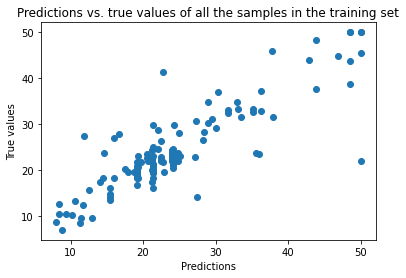

In [26]:
forest = TreeEnsemble(x_train, y_train, n_trees_best, sz_best, x_train.shape[1], min_leaf_best)
y_hat = forest.predict(x_test)
# plt.figure(figsize=(10, 3))
plt.scatter(y_hat, y_test)
plt.title('Predictions vs. true values of all the samples in the training set')
plt.xlabel('Predictions')
plt.ylabel('True values')

## 2. Implementing AdaBoost From Scratch (30 points)


*   Implement the AdaBoost algorithm for classification task. Your `AdaBoost` class should receive a method for creating a weak learner, which has a fit and predict methods (**hint**: you can simulate re-weighting of the samples by an appropriate re-sampling of the train set).
*   Use your model to find a strong classifier on the sample set given below, using $n$ weak learners:
    - For the base weak learners, use a ***linear*** SVM classifier (use `LinearSVC` with the default parameters). 
    - Split the sample set into train and test sets.
    - Plot the final decision plane of your classifier for $n\in \{1, 2, 3, 5, 10, 50\}$, and visualize the final iteration weights of the samples in those plots.
    - How does the overall train set accuracy changes with $n$?
    - Does you model starts to overfit at some point?



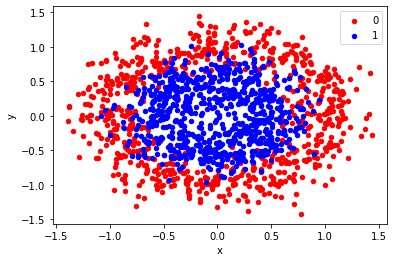

In [6]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame

# generate 2d classification dataset
X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [7]:
from sklearn.svm import LinearSVC
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
class AdaBoost():
    def __init__(self,N=3):
        self.N=N

    def fit(self,X,y):
        model_list=[]
        self.weights = np.full(X.shape[0], (1 / X.shape[0]))
        self.alpha=[]
        for i in range(self.N):
#             model = LinearSVC()
#             class_weight = {val:self.weights[index] for index,val in enumerate (y)}
#             model = LinearSVC(class_weight=class_weight)
#             model = DecisionTreeClassifier(criterion="entropy",max_depth=1)
            model = DecisionTreeClassifier(max_depth=1)
            model.fit(X,y,sample_weight=self.weights)
#             model.fit(X,y)
            y_hat=model.predict(X)
            error_vec=(y_hat!=y).astype('int')
            weighted_error=np.dot(self.weights,error_vec)/np.sum(self.weights)
            alpha=0.5*np.log((1-weighted_error)/weighted_error)
            self.alpha.append(alpha)
            vec=np.exp(-alpha * np.multiply(y, model.predict(X)))
            z = np.dot(vec,self.weights)
            self.weights = np.multiply(self.weights,vec/z)
            model_list.append(model)
        self.model_list=model_list
        return

    def predict(self,x):
        pred=np.zeros((x.shape[0],len(self.model_list)))
        for i,model in enumerate(self.model_list):
            pred[:,i]=self.alpha[i]*model.predict(x)
        self.pred=pred
        return np.sign(pred.sum(axis=1))


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_decision_boundaries(X, y, model_class, **model_params):

    reduced_data = X[:, :2]
    model = model_class(**model_params)
    model.fit(reduced_data, y)

    h = .02  

    x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
    y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])    

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

#     plt.contourf(xx, yy, Z,colors= 'red', alpha=0.4)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel("Feature-1",fontsize=15)
    plt.ylabel("Feature-2",fontsize=15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    return plt


AdaBoost prediction for test set for n=1: 0.5946666666666667



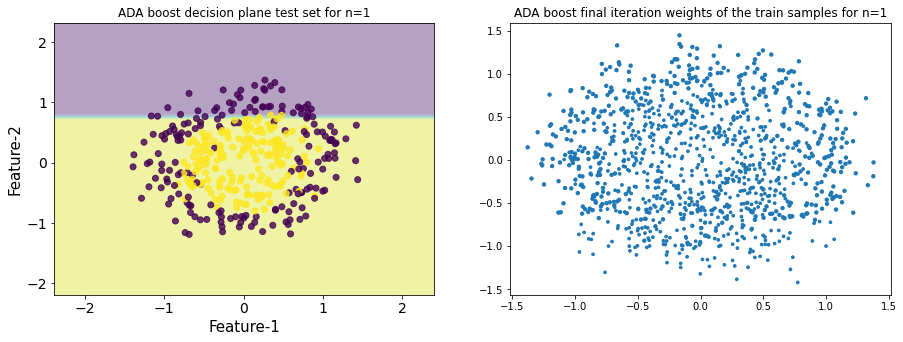


AdaBoost prediction for test set for n=2: 0.5946666666666667



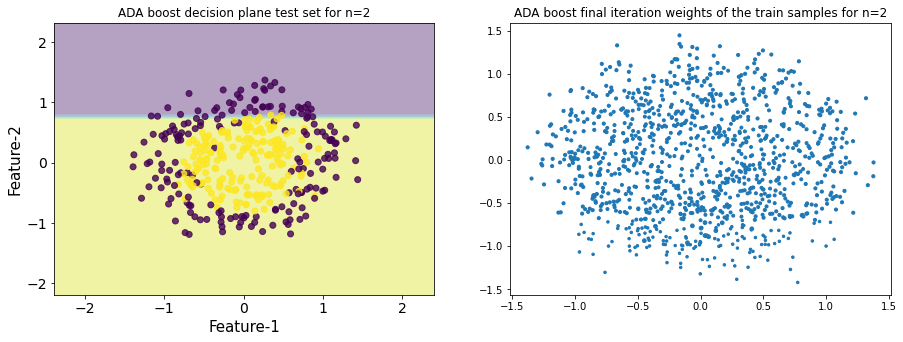


AdaBoost prediction for test set for n=3: 0.7066666666666667



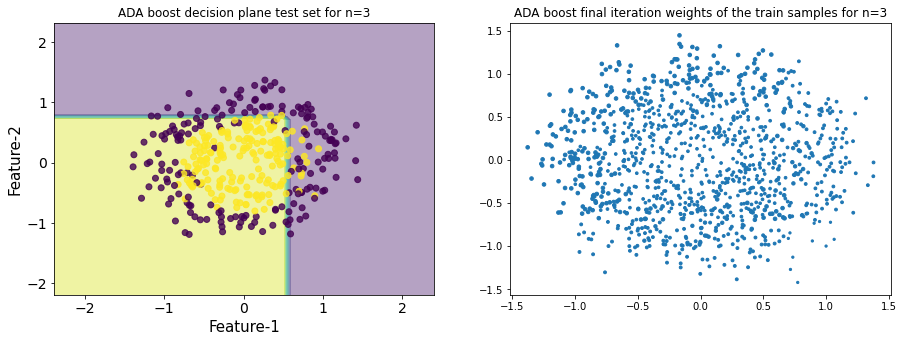


AdaBoost prediction for test set for n=5: 0.8106666666666666



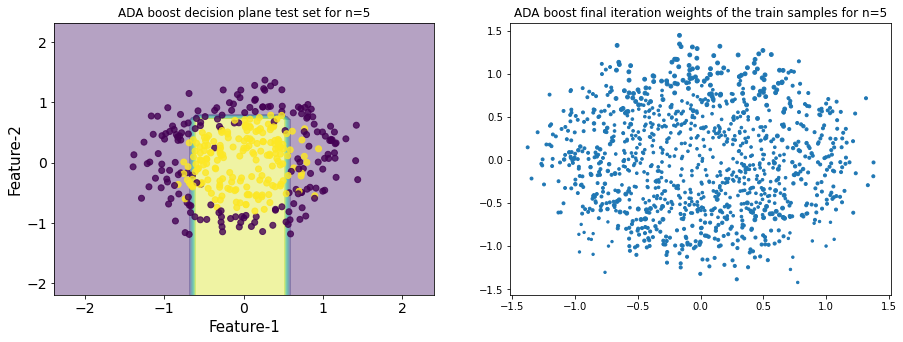


AdaBoost prediction for test set for n=10: 0.8746666666666667



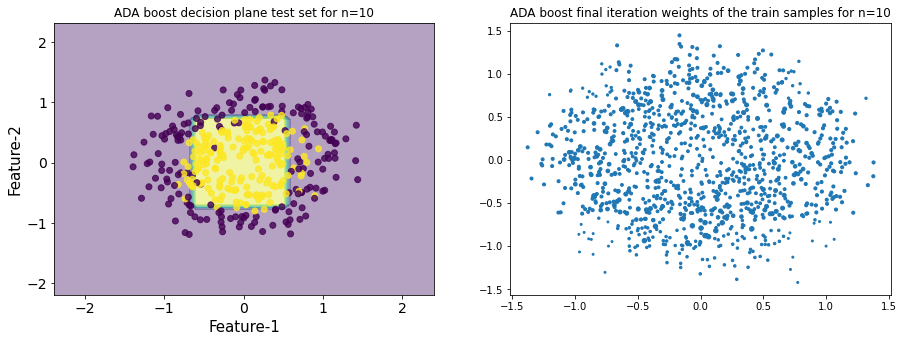


AdaBoost prediction for test set for n=50: 0.8933333333333333



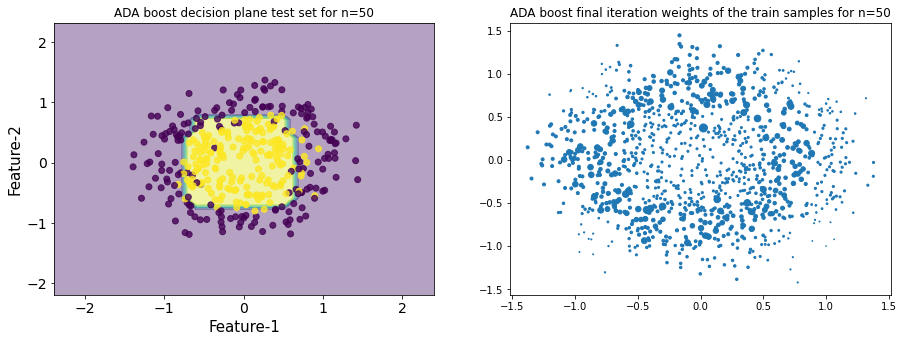


AdaBoost prediction for test set for n=100: 0.888



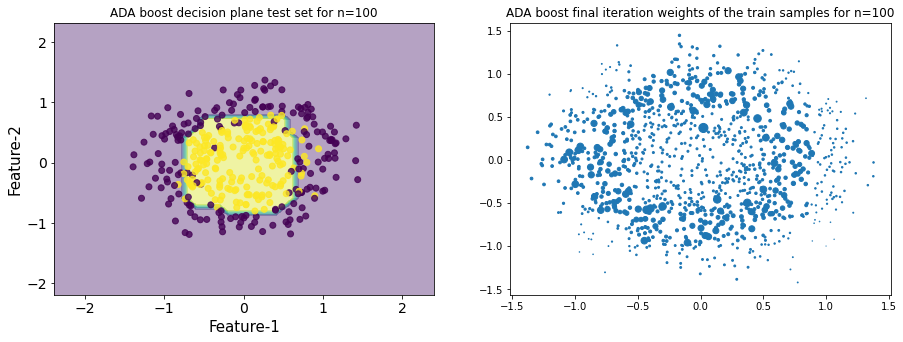


AdaBoost prediction for test set for n=500: 0.8986666666666666



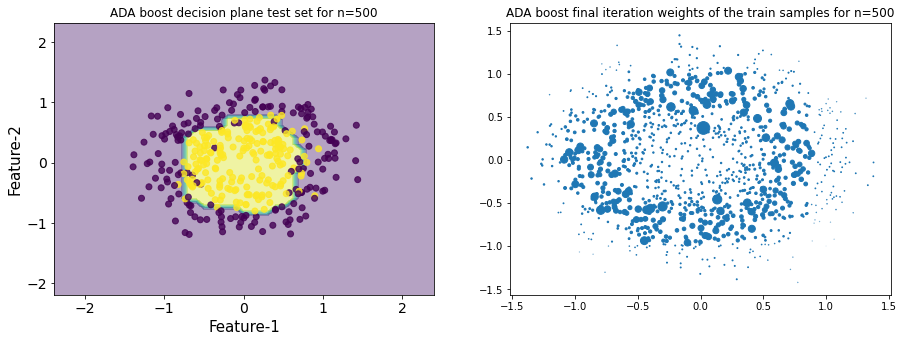


AdaBoost prediction for test set for n=1000: 0.9013333333333333



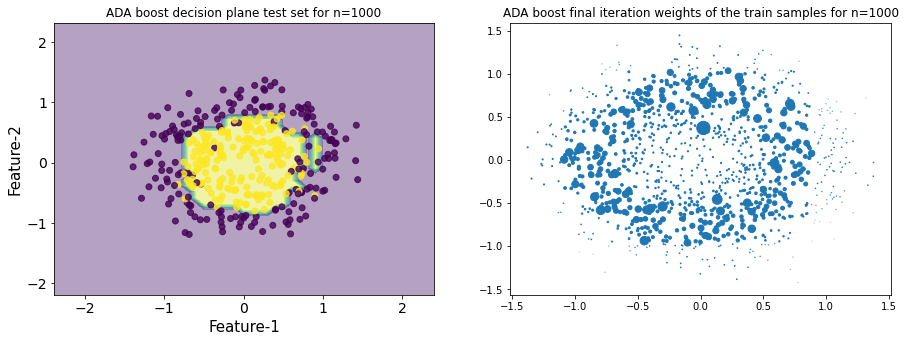

In [28]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, noise=0.2, random_state=101, factor=0.5)

y[y==0]=-1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=10)

for n in [1,2,3,5,10, 50, 100, 500, 1000]:
# for n in [3]:
    plt.figure(figsize=(15, 5))
    AD = AdaBoost(n)
    AD.fit(X_train, y_train)
    y_hat_test = AD.predict(X_test)
#     y_hat_test = AD.predict(X_test.reshape(-1,1))
    print('\nAdaBoost prediction for test set for n={}: {}\n'.format(n,sklearn.metrics.accuracy_score(y_test, y_hat_test)))
    plt.subplot(1, 2, 1)
    plt.title('ADA boost decision plane test set for n={}'.format(n))
    plot_decision_boundaries(X_test, y_test, AdaBoost, N=n)
    plt.subplot(1, 2, 2)
    plt.title('ADA boost final iteration weights of the train samples for n={}'.format(n))
    plt.scatter(X_train[:,0], X_train[:,1], s = AD.weights*10000)
    plt.show()

 **2.Answer:** <br>
 We see that the accuracy improves as n grows. At n = 1000 the model starts to overfit. The final iteration weights of the samples are visualized in the right plot of every iteration.  The "bolder" dots represent the samples with higher weights.

## 3. Boosting Trees from Scratch (40 points)
* Use the scikit-learn's DecisionTreeRegressor (again :) with `max_depth = 1` (stumps)  to write a L2Boost model which minimize the L2 square loss iteration by iteration.
Reminder: in each step, build a decision tree to minimize the error between the true label and the accumulated (sum) of the previous step predictions.
![alt text](https://explained.ai/gradient-boosting/images/latex-321A7951E78381FB73D2A6874916134D.svg)
* Use the Boston dataset to plot the MSE as a function of the number of trees for a logspace of `n_trees` up to 1,000. What is the optimal value of `n_trees`? of learning rate?
* Compare the performance with a deep DecisionTreeRegressor (find the optimal `max_depth`).  Who wins?
* Add an early-stopping mechanisim to the GBTL2 model to use a validation set to detect over-fit.

**Early stoppng mechnism** is implemented in the fit method, with 3 dedicated parameters:  
early_stop_at -  represents the number of consequent "bad" (not improving MSE) iterations to stop after. In case this param is equal to zero the mechanism is not executed.<br>
x_test, y_test - the validation set data to use for stopping mechanism.

In [11]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_squared_error

class l2boost():
    def __init__(self,n_trees=100,miu=0.1):
        self.n_trees=n_trees
        self.miu=miu
        self.model_list = model_list=[]

    def fit(self,X,y,early_stop_at=0, x_test = [], y_test = []):
        self.X=X
        self.y=y
        self.early_stop_at = early_stop_at
        self.x_test = x_test
        self.y_test = y_test
        
        last_mse = float("inf")
        loss_streak = 0
        F_0 = np.mean(y)
        self.mean_y = F_0
        F_M = np.ones(len(y)) * F_0
        for m in range(self.n_trees):
            model = DecisionTreeRegressor(max_depth=1)
#             r=np.sum([y,-FM_1.reshape(-1,1)],axis=0)
            r= y-F_M.reshape(-1,1)
            model.fit(X, r)
#             r=(y-FM_1.reshape(-1,1))**2
#             try:
#                 model.fit(X,r**2)
#             except:
#                 print('Error! m=',m)
#                 return
            self.model_list.append(model)
            if self.early_stop_at > 0:
#                 print ('from early_stop_mechanism')
                pred = self.predict(self.x_test)
                mse = mean_squared_error(self.y_test, pred)
    #             print('mse=',mse)
                if last_mse > mse:
                    last_mse = mse
                    loss_streak = 0
                else:
                    loss_streak +=1
                if self.early_stop_at <= loss_streak:
                    print('early stopping! at iteration={}'.format(m))
                    return
            F_M= F_M + self.miu * model.predict(X)
#         self.model_list=model_list
        return


    def predict(self,x):
        pred=np.zeros((x.shape[0],len(self.model_list)+1))
        pred[:, -1]=np.ones(x.shape[0])*self.mean_y
        for i,model in enumerate(self.model_list):
            #y_pred=np.sum([y_pred,model.predict(x)],axis=0)
            pred[:,i]=self.miu*model.predict(x)
        return pred.sum(axis=1)


In [12]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2].reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

DT = DecisionTreeRegressor(max_depth=1)
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)

booster = l2boost(100, 0.6)
# booster.fit(X_train, y_train)
booster.fit(X_train, y_train, early_stop_at = 5, x_test=X_test, y_test=y_test)  # early stop after 5 iterations witout improvement in MSE
y_hat_test = booster.predict(X_test)

print('l2boost test predict mse:', mean_squared_error(y_test, y_hat_test.reshape(-1, 1)))
print('DecisionTreeRegressor test predict mse:', mean_squared_error(y_test, y_pred))



early stopping! at iteration=18
l2boost test predict mse: 25.304826232958224
DecisionTreeRegressor test predict mse: 64.79492641739881



Optimal values:
mse        20.835869
lr               0.1
n_trees          101
Name: 9, dtype: object


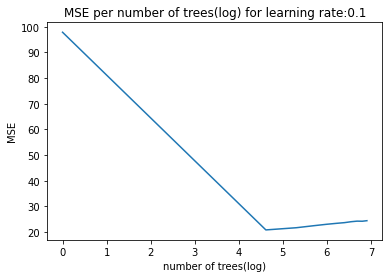

Lowest MSE = 18.362856496062996 is for DecisionTreeRegressor of max_depth = 14
DecisionTreeRegressor with max_depth of 14 is better than l2boost


In [13]:
score=pd.DataFrame(columns=['mse','lr','n_trees'])

learning_rates=np.arange(0.1,1,0.1)
trees=np.arange(1,1101,100)
i=0
for n_trees in trees:
    for lr in learning_rates:
        booster = l2boost(n_trees, lr)
        booster.fit(X_train, y_train)
        y_hat_test = booster.predict(X_test)
        score.loc[i, 'n_trees']=n_trees
        score.loc[i,'lr']=lr
        score.loc[i,'mse']=(sklearn.metrics.mean_squared_error(y_test, y_hat_test.reshape(-1, 1)))
        i+=1
        
score=score.sort_values(by='mse',ascending=True)
print('\nOptimal values:')
print(score.iloc[0, :])

mse_arr=[]
for n_trees in trees:
    booster = l2boost(n_trees,0.1)
    booster.fit(X_train, y_train)
    y_hat_test = booster.predict(X_test)
    mse_arr.append(sklearn.metrics.mean_squared_error(y_test, y_hat_test.reshape(-1, 1)))

plt.plot(np.log(trees), mse_arr)
plt.title('MSE per number of trees(log) for learning rate:{}'.format(0.1))
plt.xlabel('number of trees(log)')
plt.ylabel('MSE')
plt.show()

DT_mse=[]
depths=np.arange(1,20)
for depth in depths:
    DT = DecisionTreeRegressor(max_depth=depth)
    DT.fit(X_train, y_train)
    y_pred = DT.predict(X_test)
    DT_mse.append(sklearn.metrics.mean_squared_error(y_test,y_pred.reshape(-1, 1)))

optimal_depth = depths[DT_mse.index(min(DT_mse))]   
print('Lowest MSE = {} is for DecisionTreeRegressor of max_depth = {}'.format(min(DT_mse), optimal_depth))
print('DecisionTreeRegressor with max_depth of {} is better than l2boost'.format(optimal_depth))

**3.Answer** <br>
Optimal value of n_trees is 101 <br>
Optimal values of learning rate is 0.1 <br>
In my last executinon of decision tree model I got optimal max_depth  of 17 with MSE of 16 which is better than lboost MSE (= 20). Therefore, the winner is DecisionTreeRegressor :)

In [14]:
score

,mse,lr,n_trees
9,20.835869,0.1,101
10,21.509231,0.2,101
18,21.590474,0.1,201
27,22.552642,0.1,301
36,23.042252,0.1,401
...,...,...,...
4,75.390824,0.5,1
3,79.837689,0.4,1
2,85.06045,0.3,1
1,91.059106,0.2,1
